In [2]:
import pandas as pd
import io

In [3]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [ ]:
csv_file = io.BytesIO(uploaded['imdb_top_1000.csv'])

In [ ]:
movie_dataframe = pd.read_csv(csv_file)

In [ ]:
movie_dataframe.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## Questions
- What are the column names in the dataset?
- What is the average rating of the movies?
- How many unique genres are there?

In [ ]:
answers = {}

In [ ]:
columns = [column for column in movie_dataframe.columns]
answers["columns"] = ["columns", columns]
print("The columns of this dataset are:", columns)

The columns of this dataset are: ['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']


In [ ]:
average_rating = movie_dataframe["IMDB_Rating"].mean()
answers["average rating"] = ["Average rating", average_rating]
print("Average rating of the movies is:", average_rating)

Average rating of the movies is: 7.949299999999999


In [ ]:
genres_count = movie_dataframe["Genre"].nunique()
answers["Genres count"] = ["Genres", genres_count]
print("The count of the unique genres in this dataset is:", genres_count)

The count of the unique genres in this dataset is: 202


In [ ]:
answer_dataframe = pd.DataFrame(answers)
answer_dataframe = answer_dataframe.T
answer_dataframe.to_csv("answer.csv", index=False)
files.download("answer.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Plotting Tasks
- Plot a histogram of the genre distribution of the movies. How many movies from each genre are there in this list.
- Plot a scatterplot in this dataset for the number of movies vs year (Each year, how many movies made to this top 1000 list?)

In [ ]:
# some preprocessing before visualization

genres = movie_dataframe["Genre"]
genre_list = [genre.split(', ') for genre in genres]
flat_genre_list = list(np.concatenate(genre_list).flat)
genre_series = pd.Series(flat_genre_list)

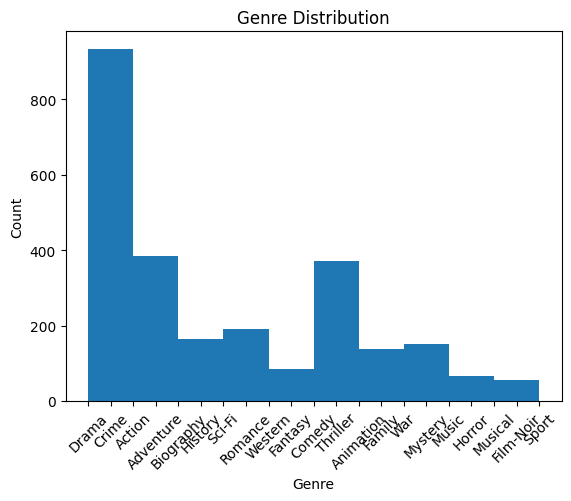

In [ ]:
# visualization part

plt.hist(genre_series, bins=10)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Number of movies from each genre, 
from collections import Counter

movies_count_by_genre = dict(Counter(flat_genre_list))
movie_genre_dataframe = pd.DataFrame.from_dict(movies_count_by_genre, orient='index', columns=['Count'])
movie_genre_dataframe

,Count
Drama,724
Crime,209
Action,189
Adventure,196
Biography,109
History,56
Sci-Fi,67
Romance,125
Western,20
Fantasy,66


### Scatter plot for movies vs year

In [ ]:
# data preprocessing

numeric_years = pd.to_numeric(movie_dataframe['Released_Year'], errors='coerce').dropna().astype(int)
movies_per_year = numeric_years.groupby(numeric_years).size().reset_index(name='Number_of_Movies')
movies_per_year['Year_Range'] = movies_per_year['Released_Year'] // 20 * 20
movies_per_range = movies_per_year.groupby('Year_Range')['Number_of_Movies'].mean().reset_index()

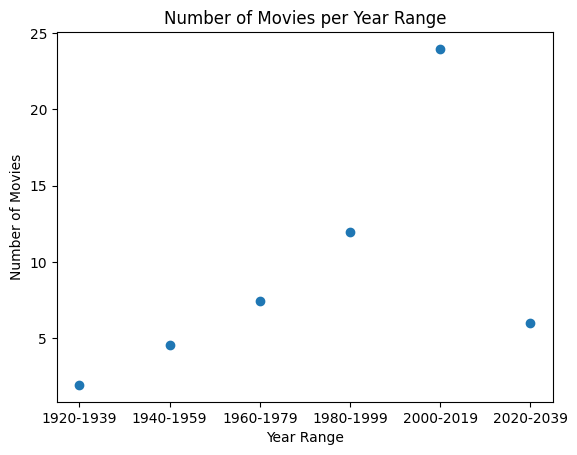

In [ ]:
plt.scatter(movies_per_range['Year_Range'], movies_per_range['Number_of_Movies'])
plt.xlabel('Year Range')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Year Range')

xticks = range(min(movies_per_range['Year_Range']), max(movies_per_range['Year_Range']) + 1, 20)
plt.xticks(xticks, [f'{year}-{year+19}' for year in xticks])

plt.show()

#### ***Note***: The visualization is done using year range, as there was visual clutter on the x-axis without the ranges, the scatter plots show the average for movies in range of 20 years

In [ ]:
movies_years_data = movie_dataframe["Released_Year"]
movies_years_data

0      1994
1      1972
2      2008
3      1974
4      1957
       ... 
995    1961
996    1956
997    1953
998    1944
999    1935
Name: Released_Year, Length: 1000, dtype: object